In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spotify_2015_2025_85k.csv")
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [4]:
df.shape

(85000, 19)

In [5]:
df.isnull().sum()

track_id             0
track_name          21
artist_name          0
album_name          46
release_date         0
genre                0
duration_ms          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
instrumentalness     0
tempo                0
stream_count         0
country              0
explicit             0
label                0
dtype: int64

In [6]:
df = df.dropna(subset=["track_name"])
df.shape

(84979, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84979 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          84979 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       84979 non-null  object 
 3   album_name        84933 non-null  object 
 4   release_date      84979 non-null  object 
 5   genre             84979 non-null  object 
 6   duration_ms       84979 non-null  int64  
 7   popularity        84979 non-null  int64  
 8   danceability      84979 non-null  float64
 9   energy            84979 non-null  float64
 10  key               84979 non-null  int64  
 11  loudness          84979 non-null  float64
 12  mode              84979 non-null  int64  
 13  instrumentalness  84979 non-null  float64
 14  tempo             84979 non-null  float64
 15  stream_count      84979 non-null  int64  
 16  country           84979 non-null  object 
 17

In [8]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["release_year"] = df["release_date"].dt.year

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df["loudness"] = df["loudness"] * (-1)

In [11]:
df["track_id"].duplicated().sum()

np.int64(0)

In [12]:
df = df.drop(columns=["track_id"])

In [13]:
df.head()

,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,32.22,0,0.436,73.12,13000,Brazil,0,Universal Music,2016
1,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,14.02,0,0.223,157.74,1000,France,1,Island Records,2022
2,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,48.26,1,0.584,71.03,1000,Germany,1,XL Recordings,2016
3,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,34.47,1,0.684,149.00,1000,France,0,Warner Music,2015
4,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,17.84,0,0.304,155.85,2000,United States,0,Independent,2022


Text(0.5, 0, 'Popularity')

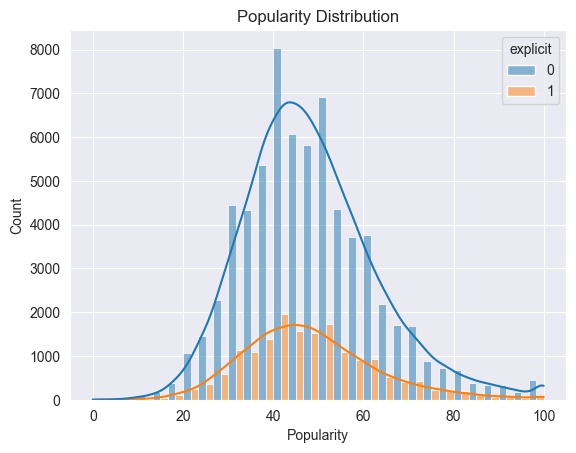

In [14]:
sns.histplot(df, x="popularity", bins=30, kde=True, hue="explicit", multiple="dodge")
plt.title("Popularity Distribution")
plt.xlabel("Popularity")

Text(0.5, 1.0, 'Correlation Matrix')

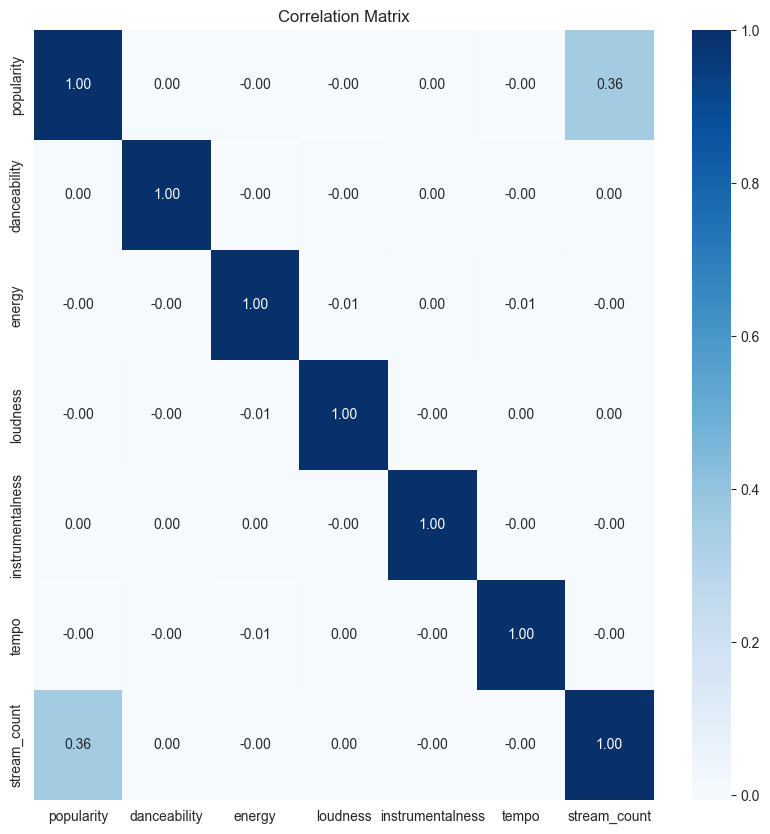

In [15]:
numerical_columns = ["popularity", "danceability", "energy", "loudness", "instrumentalness", "tempo", "stream_count"]
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")

<Axes: xlabel='popularity', ylabel='genre'>

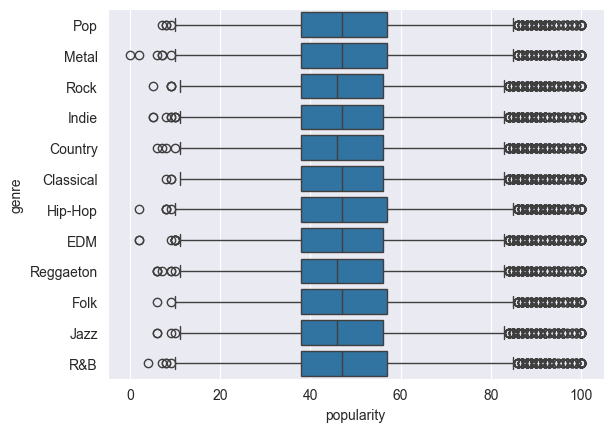

In [16]:
sns.boxplot(df, x="popularity", y="genre")